In [1]:
import argparse
from utils import *
from model import *
from train import *
import tqdm
from tqdm import tqdm
import wandb
import os
import torch

In [98]:
x = torch.tensor([3.0])

In [109]:
optimizer = torch.optim.Adam(params=[x],lr=1)

In [110]:
max_lr = 0.1
warmup_steps = 100
total_steps = 500

In [111]:
def f(step,warmup_steps,max_lr):

    if step < warmup_steps:
        return (max_lr/warmup_steps) * step
    else:
        return 0.5 * (max_lr) * (1 + math.cos((step - warmup_steps) / (total_steps - warmup_steps) * math.pi))

In [112]:
import functools

In [113]:
f_step = functools.partial(f, warmup_steps=warmup_steps,max_lr=max_lr)

In [ ]:
class CustomScheduler():

    def __init__(self,optimizer,warmup_steps,max_lr,total_steps):

        self.optimizer = optimizer
        self.warmup_steps = warmup_steps
        self.total_steps = total_steps

    def step(self):

        

In [114]:
lr_scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer,lr_lambda=f_step)

# lr_scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, 
#                     lr_lambda=lambda step: 
#                     ((max_lr * step) / warmup_steps)  if step <= warmup_steps 
#                     else 
#                     0.5 * (max_lr) * (1 + math.cos((step - warmup_steps) / (total_steps - warmup_steps) * math.pi))
#                     )

In [115]:
lrs = []
lrs_optim = []
lrs_analytic = []

for epoch in range(500):
    optimizer.step()
    lr_scheduler.step()

    lrs_analytic.append(f_step(epoch))
    lrs.append(lr_scheduler.get_last_lr())
    lrs_optim.append(optimizer.param_groups[0]['lr'])

In [116]:
import matplotlib.pyplot as plt

In [117]:
max(lrs_optim)

0.1

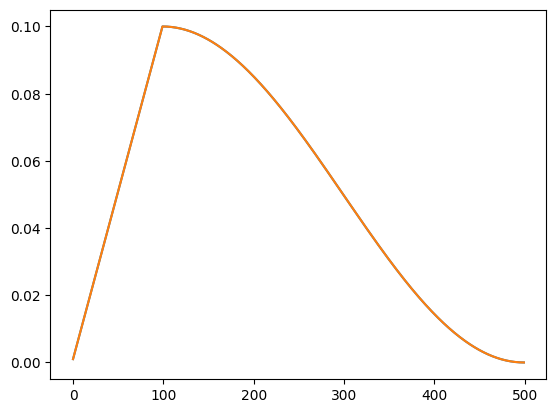

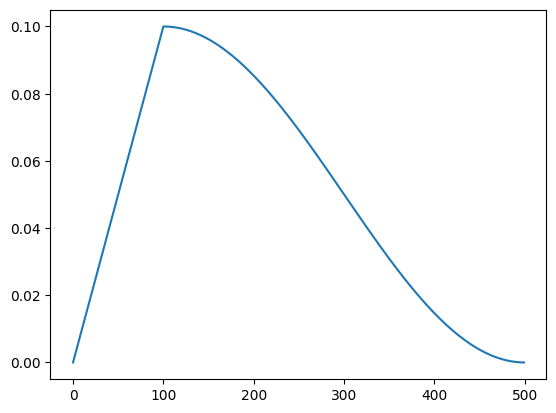

In [118]:
plt.plot(lrs)
plt.plot(lrs_optim)
plt.show()
plt.plot(lrs_analytic)
plt.show()

In [2]:
dataset = load_hf_dataset('yelp_review_full')
dataset = prepare_datasets(dataset,0.5)   

Found cached dataset yelp_review_full (/home/utsav/.cache/huggingface/datasets/yelp_review_full/yelp_review_full/1.0.0/e8e18e19d7be9e75642fc66b198abadb116f73599ec89a69ba5dd8d1e57ba0bf)


  0%|          | 0/2 [00:00<?, ?it/s]

Converting dataset format to torch for split : train
Converting dataset format to torch for split : test


In [3]:
tokenizer = get_tokenizer('GPT2')

Adding pad_token to tokenizer



In [ ]:
def tokenization(example):
    tokenized_example = {}
    tokenized_example['text'] = tokenizer.tokenize(example['text'])
    return tokenized_example

# Apply the tokenizer to all elements in the dataset and create a new dataset
tokenized_dataset = dataset.map(tokenization)

In [ ]:
import gensim
from gensim.models import Word2Vec

In [ ]:
train_data = tokenized_dataset['train']['text']

In [ ]:
model = Word2Vec(train_data, vector_size=100, window=5, min_count=1, workers=8)

In [ ]:
len(model.wv.key_to_index)

In [ ]:
model.wv.vectors.shape

In [ ]:
len(tokenizer)

In [ ]:
tokenized_dataset

In [ ]:
# def tokenization(example):
    # return {'ids':tokenizer(example["text"])['input_ids']}

def tokenization(example):
    example['text'] = 
    return {'tokenized_text':tokenizer.tokenize(example['text'])}

tokenized_dataset = dataset.map(tokenization, batched=True)

In [ ]:
tokenizer.tokenize(dataset['train'][0]['text'])

In [ ]:
tokenizer.vocab_size

In [ ]:
samples = 

In [ ]:
tokenized_dataset['train'][0]['ids']

In [ ]:
tokenizer.tokenize('included')

In [ ]:
tokenizer.get_vocab()['Ġcakes']

In [ ]:
tokenized_dataset['train'][0]

In [ ]:
tokenized_dataset = [[tokenizer.get_vocab()[x] for x in tokenizer.tokenize(dataset['train'][i]['text'])] for i in range(len(dataset['train']))]

In [ ]:
dataset['train'][1]['text']

In [ ]:
dataset['train'][0]['text']

In [ ]:
tokenizer = get_tokenizer('GPT2')

In [ ]:
set_seed(42)

In [4]:
train_loader, val_loader, test_loader = prepare_dataloaders(dataset,batch_size=64,num_workers=4)

In [5]:
class x:
    def __init__(self):
        return

args = x()
args.tokenizer_max_length = 64
args.warmup_steps = 100
args.num_epochs = 200

In [6]:
from accelerate import Accelerator

In [7]:
accelerator = Accelerator()

In [8]:
use_pretrained_embeddings = True
freeze_pretrained_embeddings = True

Model1 = ConsolidatedModelClass(
        model_name='GPT2',
        num_layers=6,
        use_pretrained_embeddings=use_pretrained_embeddings,
        freeze_pretrained_embeddings=freeze_pretrained_embeddings,
        optimizer='AdamW',
        lr=0.001,
        tokenizer=tokenizer,
        scheduler=True,
        args=args,
        )

In [9]:
m,o,t = Model1.accelerator.prepare(Model1.model,Model1.optimizer,train_loader)

In [10]:
batch = next(iter(t))

In [11]:
tokenized_batch = Model1.tokenizer(batch['text'],
                                        return_tensors='pt',
                                        padding='max_length',
                                        truncation=True,
                                        max_length=Model1.args.tokenizer_max_length)

In [12]:
Model1.step(batch)

tensor(19.8383, device='cuda:0', grad_fn=<NllLossBackward0>)

In [ ]:
tokenized_batch

In [ ]:
Model1.model.device

In [ ]:
batch.device

In [ ]:
Model1.step(batch)

In [ ]:
Model1.model.train()

# store losses
epoch_loss = 0

# iterate over dataloader
for i,batch in tqdm(enumerate(train_loader)):

    # compute loss for each model and log
    loss = Model1.step(batch)
    epoch_loss += loss

# take scheduler step
if Model1.scheduler_flag:
    Model1.scheduler.step()

# log in central dict, with average train loss
Model1.losses['train_loss'].append(epoch_loss.item()/len(train_loader))

In [ ]:
for batch in t:
    print(batch)
    exit()

In [ ]:
Model1.model.device

In [ ]:
Model1.train(train_loader,val_loader)

In [ ]:
Model1.scheduler.get_last_lr()[0]

In [ ]:
Model1.model

In [ ]:
use_pretrained_embeddings = True
freeze_pretrained_embeddings = False

Model2 = ConsolidatedModelClass(
        model_name='GPT2',
        num_layers=6,
        use_pretrained_embeddings=use_pretrained_embeddings,
        freeze_pretrained_embeddings=freeze_pretrained_embeddings,
        optimizer='AdamW',
        lr=0.001,
        tokenizer=tokenizer,
        scheduler=None,
        args=args,
        device='cuda')

In [ ]:
use_pretrained_embeddings = False
freeze_pretrained_embeddings = False

Model3 = ConsolidatedModelClass(
        model_name='GPT2',
        num_layers=6,
        use_pretrained_embeddings=use_pretrained_embeddings,
        freeze_pretrained_embeddings=freeze_pretrained_embeddings,
        optimizer='AdamW',
        lr=0.001,
        tokenizer=tokenizer,
        scheduler=None,
        args=args,
        device='cuda')

In [ ]:
dataset = load_hf_dataset('yelp_review_full')
dataset = prepare_datasets(dataset,0.01)   

print("Length of training dataset:", len(dataset['train']))
print("Length of validation dataset:", len(dataset['test']))

# ----------------------------- Load dataloaders ----------------------------- #
train_loader, val_loader, test_loader = prepare_dataloaders(dataset,batch_size=64,num_workers=16)

In [ ]:
import gc
gc.collect()

In [ ]:
torch.cuda.memory_summary()

In [ ]:
torch.cuda.mem_get_info()

In [ ]:
!nvidia-smi

In [ ]:
with torch.no_grad():
    torch.cuda.empty_cache()

In [ ]:
for epoch in tqdm(range(200)):

    train_models(Model1,train_loader,args)
    evaluate_models(Model1,test_loader,args)

    train_models(Model2,train_loader,args)
    evaluate_models(Model2,test_loader,args)

    train_models(Model3,train_loader,args)
    evaluate_models(Model3,test_loader,args)

    print(Model1.losses['train_loss'][-1])
    print(Model1.losses['val_loss'][-1])

    print(Model2.losses['train_loss'][-1])
    print(Model2.losses['val_loss'][-1])

    print(Model3.losses['train_loss'][-1])
    print(Model3.losses['val_loss'][-1])

    # # for model in models:
    # train_loss = Model1.losses['train_loss'][-1]
    # val_loss = Model1.losses['val_loss'][-1]

    # print(f"\nhas train loss : {train_loss} \n \
    #                         and test loss : {val_loss}")

    # wandb.log({
    #     f"train loss" : train_loss,
    #     f"val loss" : val_loss,
    # },
    # step = epoch
    # )